**UAS DATA MINING**

Dicky Robyansyah

23.11.5564


Import Library & Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('data_diabetes.csv')

# Menampilkan informasi dataset
display(df.head())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


In [4]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,499.000000,499.000000,499.000000,499.00000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,3.803607,121.354709,68.743487,20.57515,80.390782,31.984569,0.485377,33.086172,0.364729
std,3.345786,32.441489,19.452608,15.72019,119.774561,8.210358,0.345546,11.636849,0.481837
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.00000,0.000000,27.050000,0.252000,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.00000,36.000000,32.000000,0.383000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.00000,122.000000,36.600000,0.633500,39.500000,1.000000
max,17.000000,197.000000,122.000000,63.00000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Preprocessing

In [5]:
# Mengganti nilai 0 yang tidak masuk akal secara medis menjadi NaN
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

In [6]:
# Mengisi nilai NaN dengan nilai rata-rata (mean)
df.fillna(df.mean(), inplace=True)

In [7]:
# Mengecek kembali missing values
display(df.isnull().sum())

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Exploratory Data Analysis (EDA)

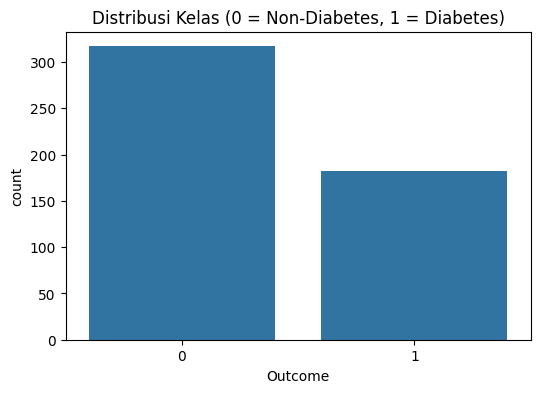

In [8]:
# Distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome')
plt.title('Distribusi Kelas (0 = Non-Diabetes, 1 = Diabetes)')
plt.show()

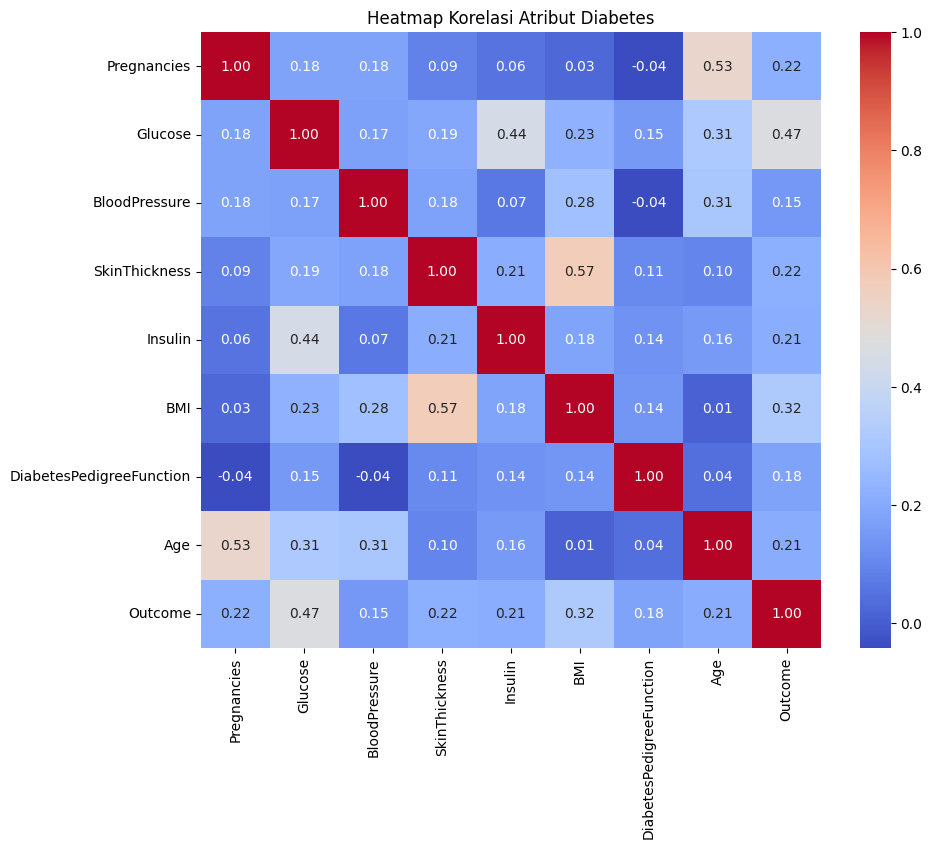

In [9]:
# Heatmap korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Atribut Diabetes")
plt.show()

Seleksi Fitur

In [10]:
# Memisahkan atribut fitur (X) dan label/target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Fitur yang digunakan:", X.columns.tolist())

Fitur yang digunakan: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import joblib

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalisasi / Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Pelatihan Model menggunakan Naive Bayes (Gaussian Naive Bayes)
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [16]:
# Simpan model
joblib.dump(model, 'model_diabetes_nb.pkl')
print("Model Naive Bayes berhasil dilatih dan disimpan (model_diabetes_nb.pkl)")

Model Naive Bayes berhasil dilatih dan disimpan (model_diabetes_nb.pkl)


Evaluasi model

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memprediksi data test
y_pred = model.predict(X_test_scaled)

In [18]:
# Menampilkan akurasi dan classification report
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score : 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        64
           1       0.73      0.67      0.70        36

    accuracy                           0.79       100
   macro avg       0.77      0.76      0.77       100
weighted avg       0.79      0.79      0.79       100



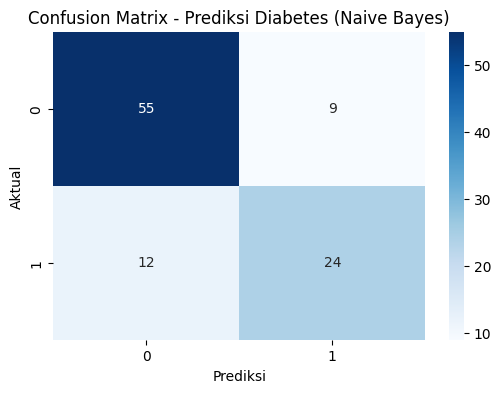

In [19]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Prediksi Diabetes (Naive Bayes)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

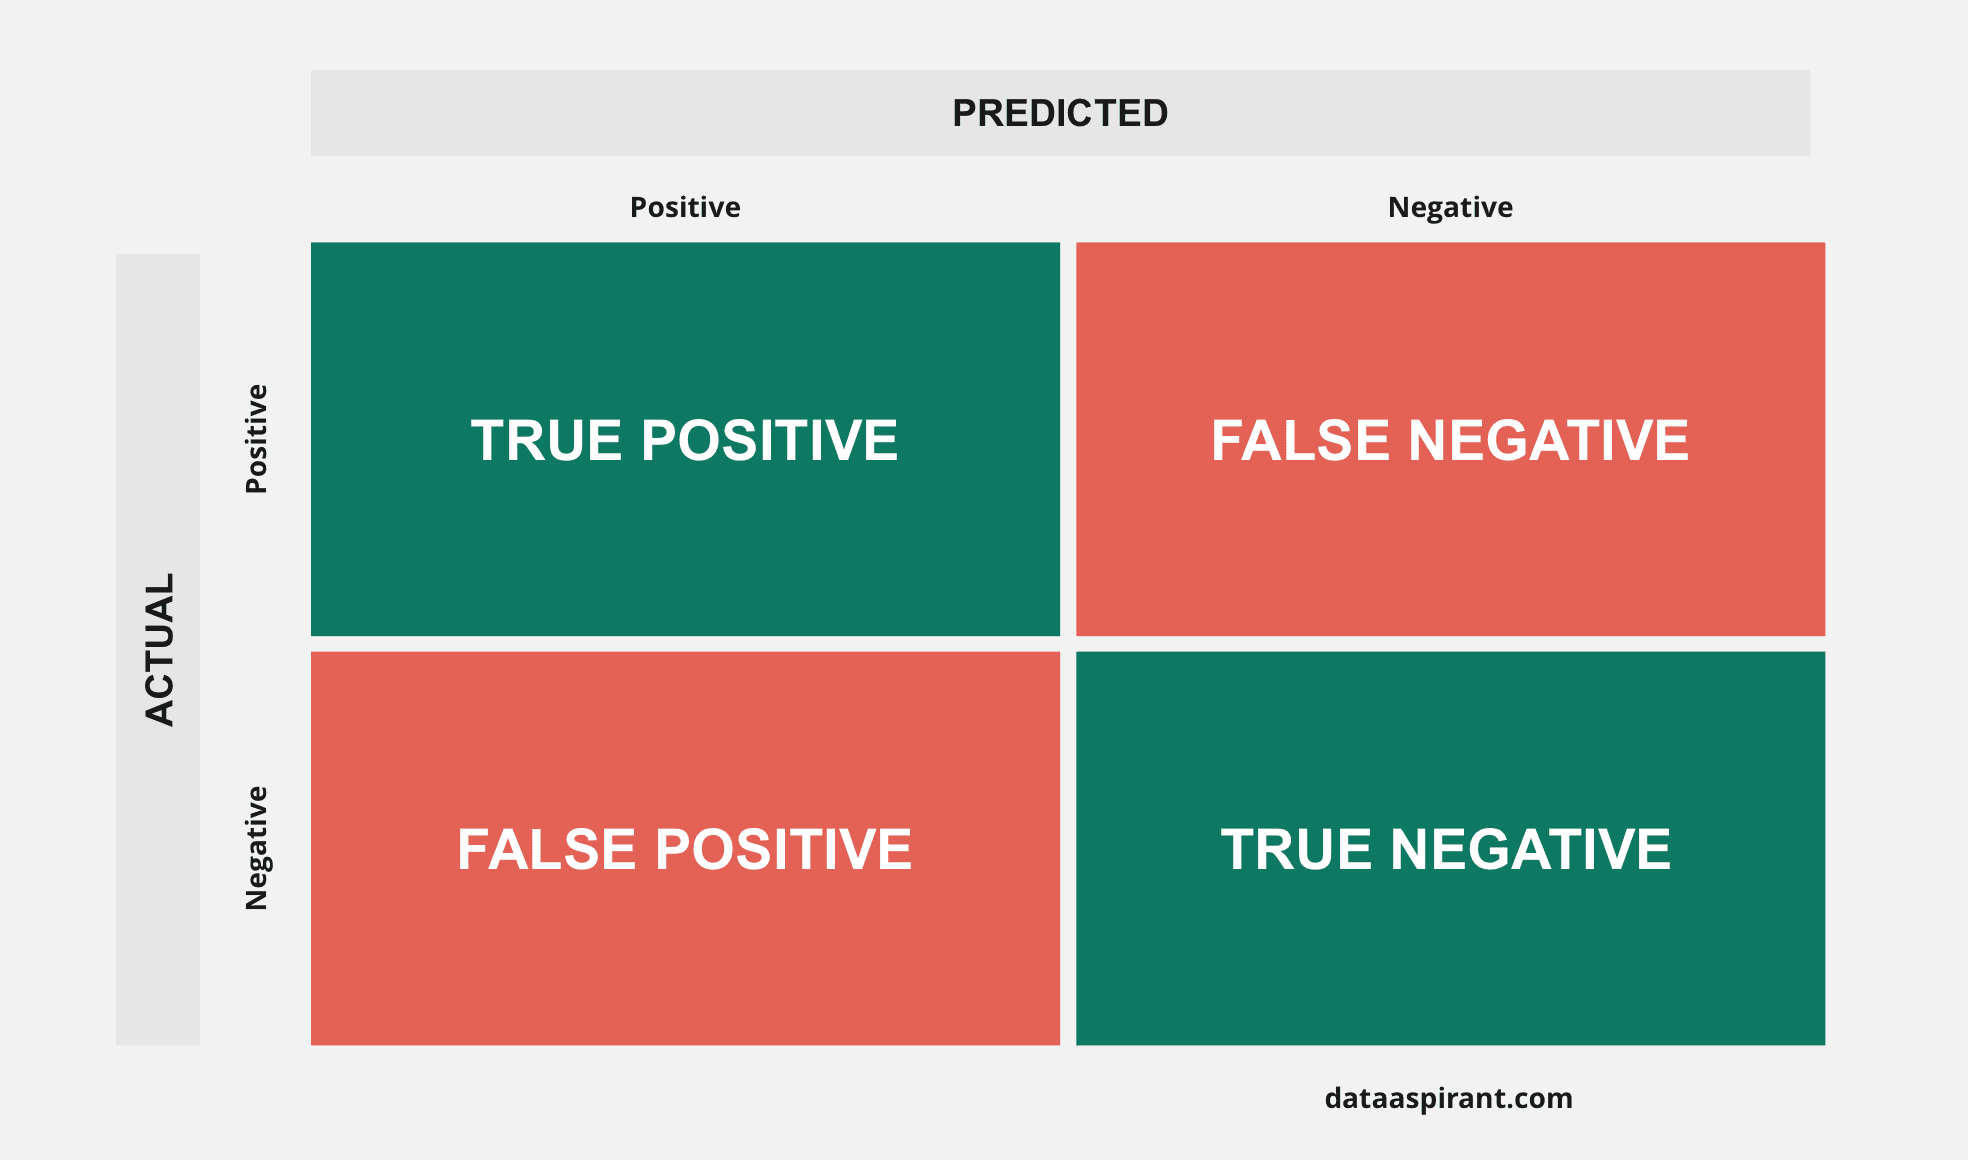